Language Modeling

1.   Reading Corpus, Building Vocabulary (unigram, bigram ...)
2.   Language Modeling
3.   A very Basic approach to generate text using LM



In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [2]:
#print(nltk.corpus.brown.fileids())
brownCorpus = nltk.Text(nltk.corpus.brown.words(nltk.corpus.brown.fileids()))

In [3]:
print(len(brownCorpus)) # total tokens

1161192


In [ ]:
# Ignore this for now - Revisit this later.
#Heap's Law                             # Heap's law tells us the number of words needed (vocabulary of the language / corpus) to model the language sufficiently well.
import pandas as pd
corpusSize = 0
uniqueTokens = set()
j = 0
dic = {}
for word in brownCorpus:
    uniqueTokens.add(word)
    corpusSize += 1
    dic[j] = {"Corpus Size": corpusSize, "Unique Tokens": len(uniqueTokens)}
    j = j+1

Vcount_DF =  pd.DataFrame.from_dict(dic, "index")

In [ ]:
# Ignore this for now, revisit this later.
Vcount_DF.iloc[:,1]


0              1
1              2
2              3
3              4
4              5
           ...  
1161187    56056
1161188    56056
1161189    56056
1161190    56057
1161191    56057
Name: Unique Tokens, Length: 1161192, dtype: int64

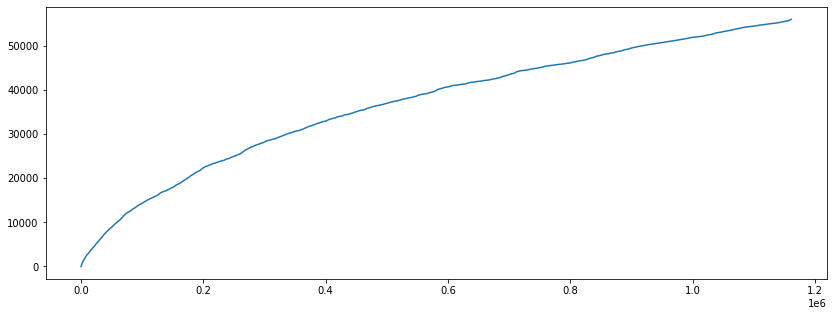

In [ ]:
# Ignore this for now - Revisit this later.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 5]

plt.plot(Vcount_DF.iloc[:,0], Vcount_DF.iloc[:,1])

In [4]:
#frequency - n-grams

from collections import Counter
from nltk.util import ngrams
from nltk.probability import FreqDist   # For every unique token, how many times has it occurred in the 'brown' corpus. The package is used to plot the frequency distribution.


Zipf Law: Zipf's law describes how the frequency of a word in natural language, is dependent on its rank in the frequency table. So the most frequent word occurs twice as often as the second most frequent work, three times as often as the subsequent word, and so on until the least frequent word

rank(w) = k/freq(w)

In [5]:
brownFD = FreqDist(t.lower() for t in brownCorpus)    # Note: The total number of unigrams are nothing but the total number of unique tokens
print("unique unigrams in brown corpus-", len(brownFD))

unique unigrams in brown corpus- 49815


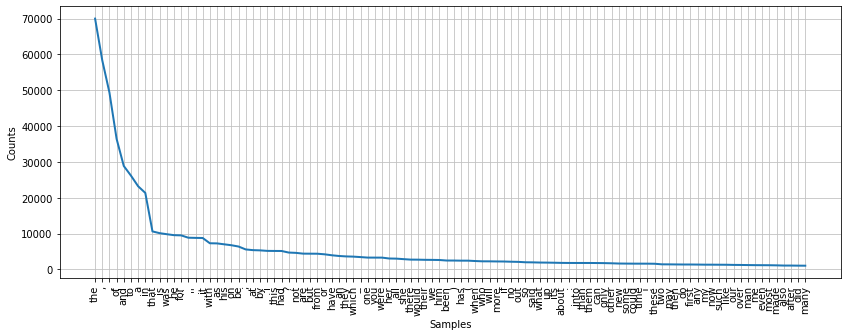

In [6]:
# Print the frequency of the unique tokens

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 5]
brownFD.plot(100)

unique bigrams in brown corpus- 455267
however possible bigrams : 2481534225


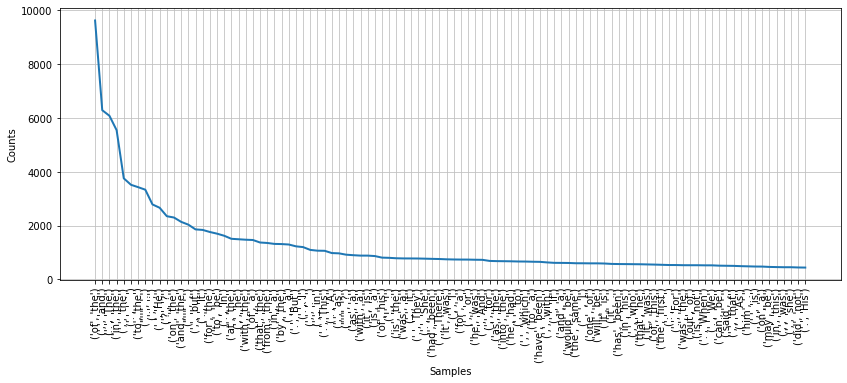

In [7]:
#plotting bigrams

n = 2 
bigrams = ngrams(brown.words(), n)      # The method ngrams from package ngrams takes in the total words in the corpus and with n = 2, provides the list of bigrams in the corpus
brown2gramFD = nltk.FreqDist(token for token in bigrams)
print("unique bigrams in brown corpus-", len(brown2gramFD))
print("however possible bigrams :", 49815*49815 )
plt.rcParams['figure.figsize'] = [14, 5]
brown2gramFD.plot(100)                  # Plotting the top 100 bigrams

unique trigrams in brown corpus- 907494


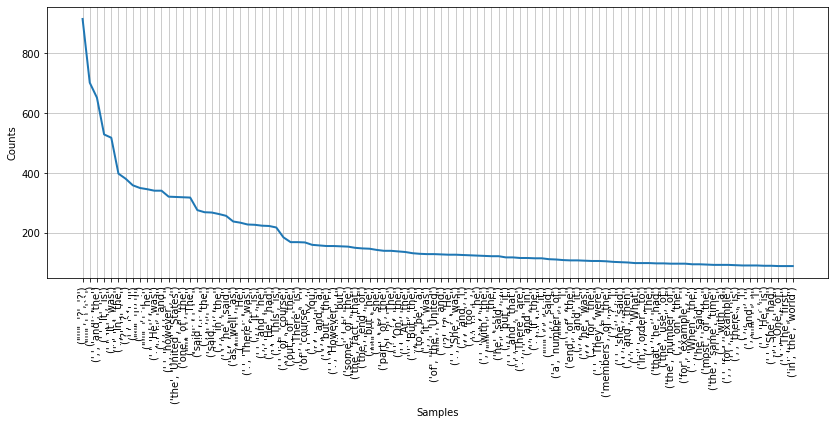

In [8]:
n = 3
trigrams = ngrams(brown.words(), n)

brown3gram = nltk.FreqDist(token for token in trigrams)
print("unique trigrams in brown corpus-", len(brown3gram))
plt.rcParams['figure.figsize'] = [14, 5]
brown3gram.plot(100)

Building Language Model

In [9]:
nltk.download('punkt')
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
def unigramLM(input):
  total_tokens = len(brownCorpus)
  Prob_input = 1 #0 if log else 1
  
  for token in nltk.word_tokenize(input):
    count_w = brownFD[token]
    prob = count_w/total_tokens
    #Prob_input += math.log2(prob)
    print("(", token, ")", count_w, prob)
    Prob_input *= count_w/total_tokens
  return Prob_input


In [3]:
input = ["the sky has clouds", "the the the the"]

for phrase in input:
  print("probability of ", phrase, "is ", unigramLM(phrase))



NameError: name 'brownCorpus' is not defined

Bigram Language Modeling

In [12]:
#extracting bigram count

print(brown2gramFD[('there', 'are')])
print(brown2gramFD[('there', 'is')])
print(brown2gramFD[('the', 'the')])
print(brownFD['there'])

200
356
0
2728


In [13]:
#bigram LM: count(w_{i-1}, w_i)/sum(w_{i-1}) count(there are)/count(there) </s>

def bigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-1):
    countBigram = brown2gramFD[(token[i], token[i+1])]
    countBase = brownFD[token[i]]
    print("(", token[i], token[i+1], ")", countBigram, countBase, countBigram/countBase)
    prob_input *= countBigram/countBase
  
  return prob_input

In [14]:
input = ["there is a cat", "the the the the"]
#(<s> there),there is, is a, a cat, (cat </s>)

for phrase in input:
  print("probability of ", phrase, "is ", bigramLM(phrase))

( there is ) 356 2728 0.13049853372434017
( is a ) 864 10109 0.08546839449995054
( a cat ) 6 23195 0.00025867643888769133
probability of  there is a cat is  2.8851477030438476e-06
( the the ) 0 69971 0.0
( the the ) 0 69971 0.0
( the the ) 0 69971 0.0
probability of  the the the the is  0.0


Trigram Model

In [ ]:
#trigram LM: count(w_{i-2}, w_{i-1}, w_i)/{sum of w in V}c(w_{i-2}, w_{i-1}, w)

def trigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-2):
    counttrigram = brown3gram[(token[i], token[i+1], token[i+2])]
    countBase = brown2gramFD[(token[i], token[i+1])]
    print("(", token[i], token[i+1], token[i+2], ")", counttrigram,countBase, counttrigram/countBase)
    prob_input *= counttrigram/countBase
  
  return prob_input

In [ ]:
input = ["there is a cat", "the the the the"]

for phrase in input:
  print("probability of ", phrase, "is ", trigramLM(phrase))

( there is a ) 82 356 0.2303370786516854
( is a cat ) 0 864 0.0
probability of  there is a cat is  0.0


ZeroDivisionError: ignored

In [ ]:
#textGeneration- bigram

def textGenerateBigram(start, n):
  punct = [",", "."]
  output= [start]
  while n:
    max= 0
    prevToken = start
    for (token1, token2) in brown2gramFD:
      if token2 not in punct:
        if token1.lower()==prevToken.lower() and max<brown2gramFD[(token1, token2)]:
          #print(token1, token2, brown2gramFD[(token1, token2)] )
          max = brown2gramFD[(token1, token2)]
          start = token2
    n = n-1;
    output.append(start)
  print(output)
  return


In [ ]:
textGenerateBigram('it', 15)

['it', 'is', 'a', 'few', 'years', 'ago', 'when', 'the', 'same', 'time', 'to', 'the', 'same', 'time', 'to', 'the']


In [ ]:
#measuring perplexity

#create a test set, compute the probability for all phrases in test set.




Smoothing


1.   Laplace Smoothing
2.   Backoff [if you are using lambda, you will require dev set]
3.   Good Turing Estimate



In [ ]:
# shows a certain number of characters before and after every occurrence of a given word
brownCorpus.concordance("spite")

Displaying 25 of 56 matches:
nce Department . On net balance , in spite of Controller Gerosa's opposition to
 called a trained soldier . But , in spite of this , I , at present a man 31 ye
in caps , of course , with the `` in spite '' as faded as possible ) , the slog
ty of spirit emerges in this play in spite of the author's convictions to the c
holic plot to kill King James 1 . In spite of the increase in numbers and prest
noticed that his face was radiant in spite of his suffering and I learned that 
already semisecret anyhow . But , in spite of all this , enough evidence remain
, in his youth a devout Baptist , in spite of his friendship for the Quaker poe
 and precision , and if war comes in spite of our most ardent desires for peace
dered , and finally opposed , but in spite of many objections , the Court grant
re saved , but the oxen drowned . In spite of this catastrophe , the bridge was
sity courses in interior design . In spite of this , many universities offer ad
he whole th

In [ ]:
#words which occur after "constant" or "spite"
bigramSet = dict()

for t1,t2 in brown2gramFD:
    if t1=='constant':
        if (t1, t2) in bigramSet:
            bigramSet[(t1,t2)] = bigramSet[(t1,t2)]+1
        else:
            bigramSet.update({(t1,t2):1})

NameError: name 'brownNgramFD' is not defined

In [ ]:
sorted(bigramSet.items(), key=lambda x: x[1], reverse=True)

[(('constant', 'problem'), 1),
 (('constant', 'pressure'), 1),
 (('constant', 'problems'), 1),
 (('constant', 'expansion'), 1),
 (('constant', 'reassurance'), 1),
 (('constant', 'supervision'), 1),
 (('constant', ','), 1),
 (('constant', 'sum'), 1),
 (('constant', 'risk'), 1),
 (('constant', 'is'), 1),
 (('constant', '.'), 1),
 (('constant', 'known'), 1),
 (('constant', 'of'), 1),
 (('constant', 'use'), 1),
 (('constant', 'requests'), 1),
 (('constant', 'and'), 1),
 (('constant', 'camping'), 1),
 (('constant', 'application'), 1),
 (('constant', 'experimentation'), 1),
 (('constant', 'process'), 1),
 (('constant', 'fight'), 1),
 (('constant', 'elements'), 1),
 (('constant', 'experiments'), 1),
 (('constant', 'demand'), 1),
 (('constant', ':'), 1),
 (('constant', 'snapping'), 1),
 (('constant', 'stream'), 1),
 (('constant', 'visitor'), 1),
 (('constant', 'symbols'), 1),
 (('constant', 'temperature'), 1),
 (('constant', 'component'), 1),
 (('constant', 'arc'), 1),
 (('constant', 'P'), 1),

In [ ]:
print(len(bigramSet)) #unique cases

54


In [ ]:
totalOccurrence = 0

for (t1,t2) in bigramSet:
    totalOccurrence = totalOccurrence + bigramSet[(t1,t2)]
    
print(totalOccurrence)

54


[(('lineage', ','), 1), (('mouth', 'whose'), 1), (('only', 'fault'), 1), (("novelist's", 'carping'), 1), (('carping', 'phrase'), 1), (('lower', 'lip'), 1), (('lip', 'was'), 1), (('too', 'voluptuous'), 1), (('voluptuous', '.'), 1), (('From', 'what'), 1), (('to', 'gauge'), 1), (('gauge', 'in'), 1), ((',', 'greedy'), 1), (('greedy', 'glance'), 1), (('figure', 'inside'), 1), (('the', 'coral-colored'), 1), (('coral-colored', 'boucle'), 1), (('boucle', 'dress'), 1), (('was', 'stupefying'), 1), (('stupefying', '.'), 1)]


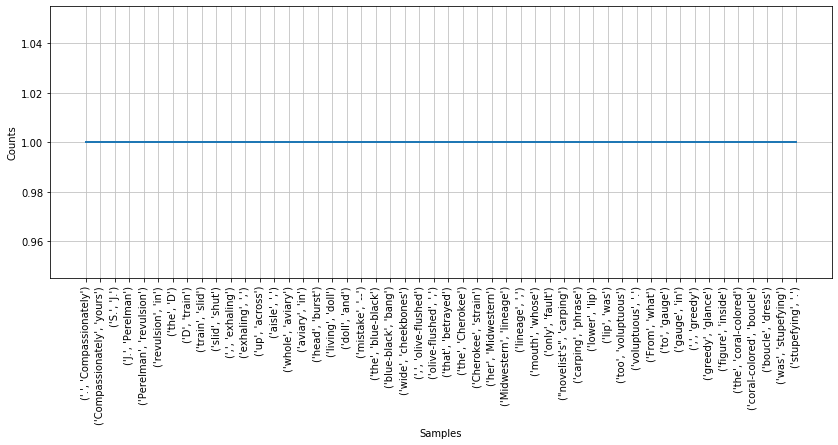

In [ ]:
# infrequent bigrams (last 150)
infrequent = FreqDist(dict(brownNgramFD.most_common()[-50:]))
print(brownNgramFD.most_common()[-20:])
infrequent.plot()


# Google N-grams

Refer Link: https://books.google.com/ngrams/info#
Implement Stupid back off